In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =pd.read_excel('1688640705_hr_comma_sep.xlsx')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
df = df.rename(columns={'average_montly_hours': 'averageMonthlyHours',
                        'sales' : 'department'})

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,averageMonthlyHours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.shape

(14999, 10)

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
averageMonthlyHours      0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
averageMonthlyHours        int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [10]:
df.duplicated(keep='first').sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(11991, 10)

# Data Analysis

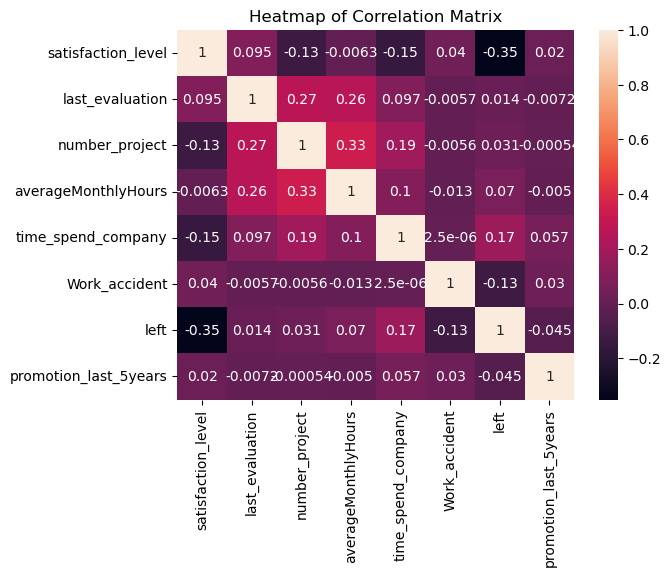

In [13]:
df.corr(numeric_only=True)
corel = df.corr(numeric_only=True)
sns.heatmap(corel, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Monthly Hours

In [14]:
df['averageMonthlyHours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [15]:
avm = len(df['averageMonthlyHours'].unique())
avm

215

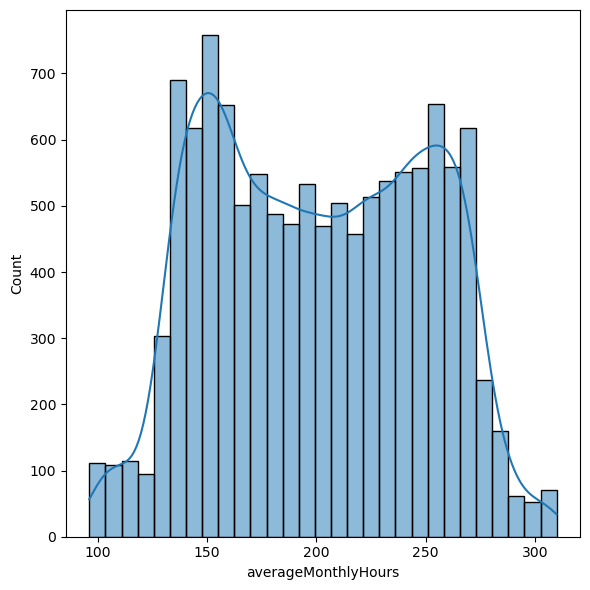

In [16]:
plt.figure(figsize=(6,6))
sns.histplot(data =df, x= df['averageMonthlyHours'],kde=True)
plt.tight_layout()
plt.show()

### Number of Projects

In [17]:
df['number_project'].value_counts()

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

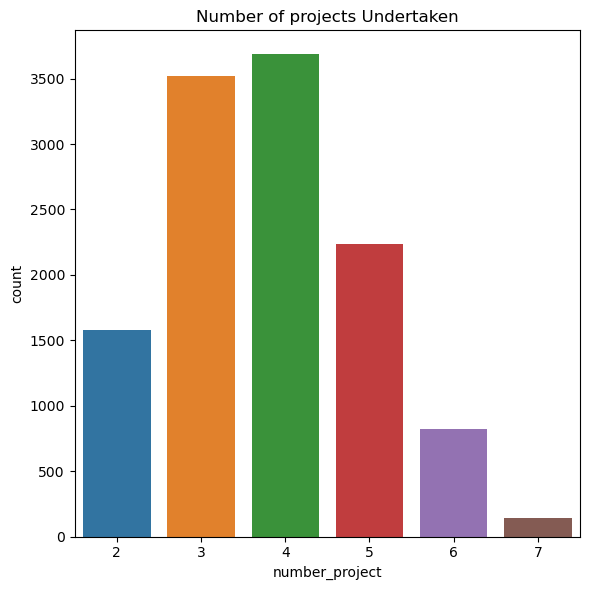

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x = 'number_project')
plt.title('Number of projects Undertaken')
plt.tight_layout()
plt.show()

# Satisfaction Level

In [19]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

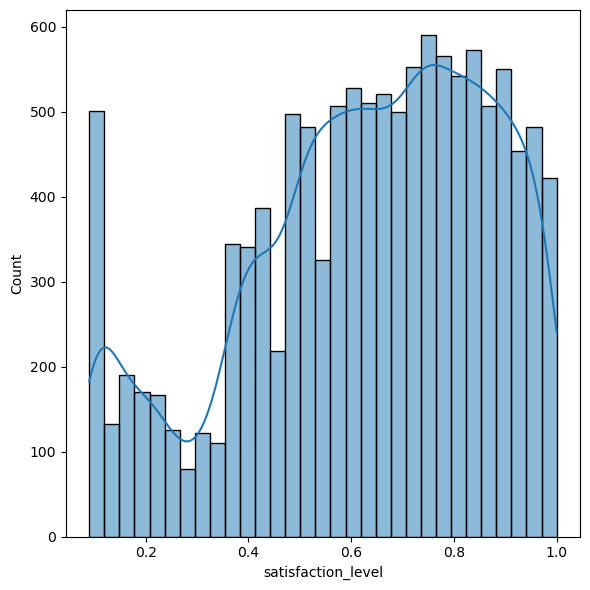

In [20]:
plt.figure(figsize=(6,6))
sns.histplot(data =df, x= df['satisfaction_level'],kde=True)
plt.tight_layout()
plt.show()

# Last Evaluation

In [21]:
df['last_evaluation'].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

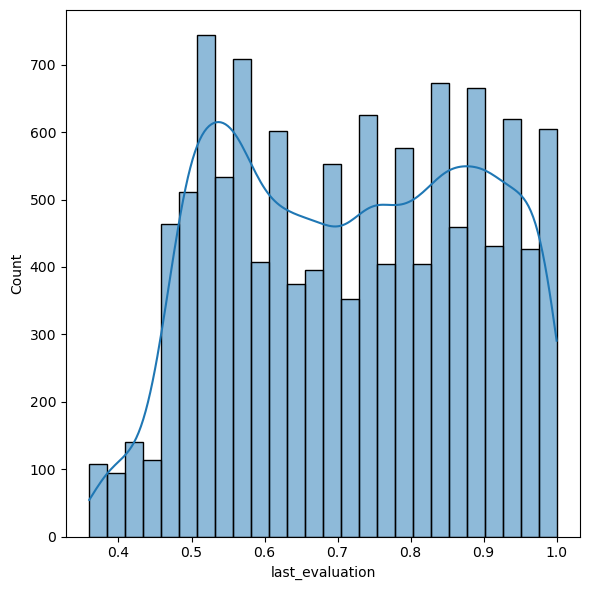

In [22]:
plt.figure(figsize=(6,6))
sns.histplot(data =df, x= df['last_evaluation'],kde=True)
plt.tight_layout()
plt.show()

# K-Means Clustering of Employee Turnover

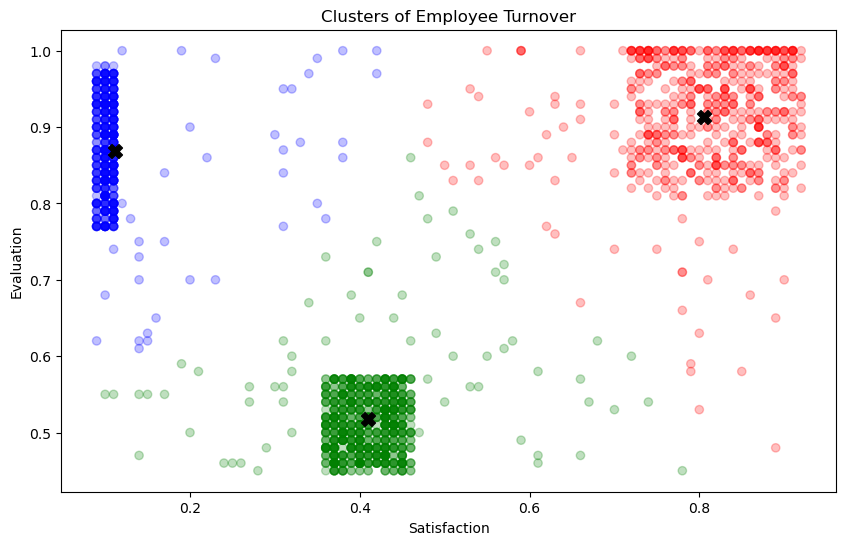

In [23]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.left==1][["satisfaction_level","last_evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.show()


In [24]:
cat_var = ['department','salary','left','promotion_last_5years']
num_var = ['satisfaction_level','last_evaluation','number_project','averageMonthlyHours','time_spend_company', 'Work_accident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction_level,last_evaluation,number_project,averageMonthlyHours,time_spend_company,Work_accident
0,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.38,0.53,2,157,3,0
1,1,0,False,False,False,False,False,False,True,False,...,False,False,True,False,0.80,0.86,5,262,6,0
2,1,0,False,False,False,False,False,False,True,False,...,False,False,True,False,0.11,0.88,7,272,4,0
3,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.72,0.87,5,223,5,0
4,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.37,0.52,2,159,3,0


In [25]:
new_df.shape

(11991, 21)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve


In [27]:
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [28]:
print(X_train.shape)
print(X_test.shape)

(9592, 20)
(2399, 20)


In [29]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)


SMOTE sample shape: (15998, 20) (15998,)


# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

In [31]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

0.8178968965890825

In [32]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.75
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2001
           1       0.43      0.67      0.52       398

    accuracy                           0.79      2399
   macro avg       0.68      0.75      0.70      2399
weighted avg       0.84      0.79      0.81      2399



# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

In [34]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.978722697715915

In [35]:
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.93      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



# Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

In [37]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.9664635871034599

In [38]:
print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.88      0.92      0.90       398

    accuracy                           0.96      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.96      0.97      2399



# ROC Graph

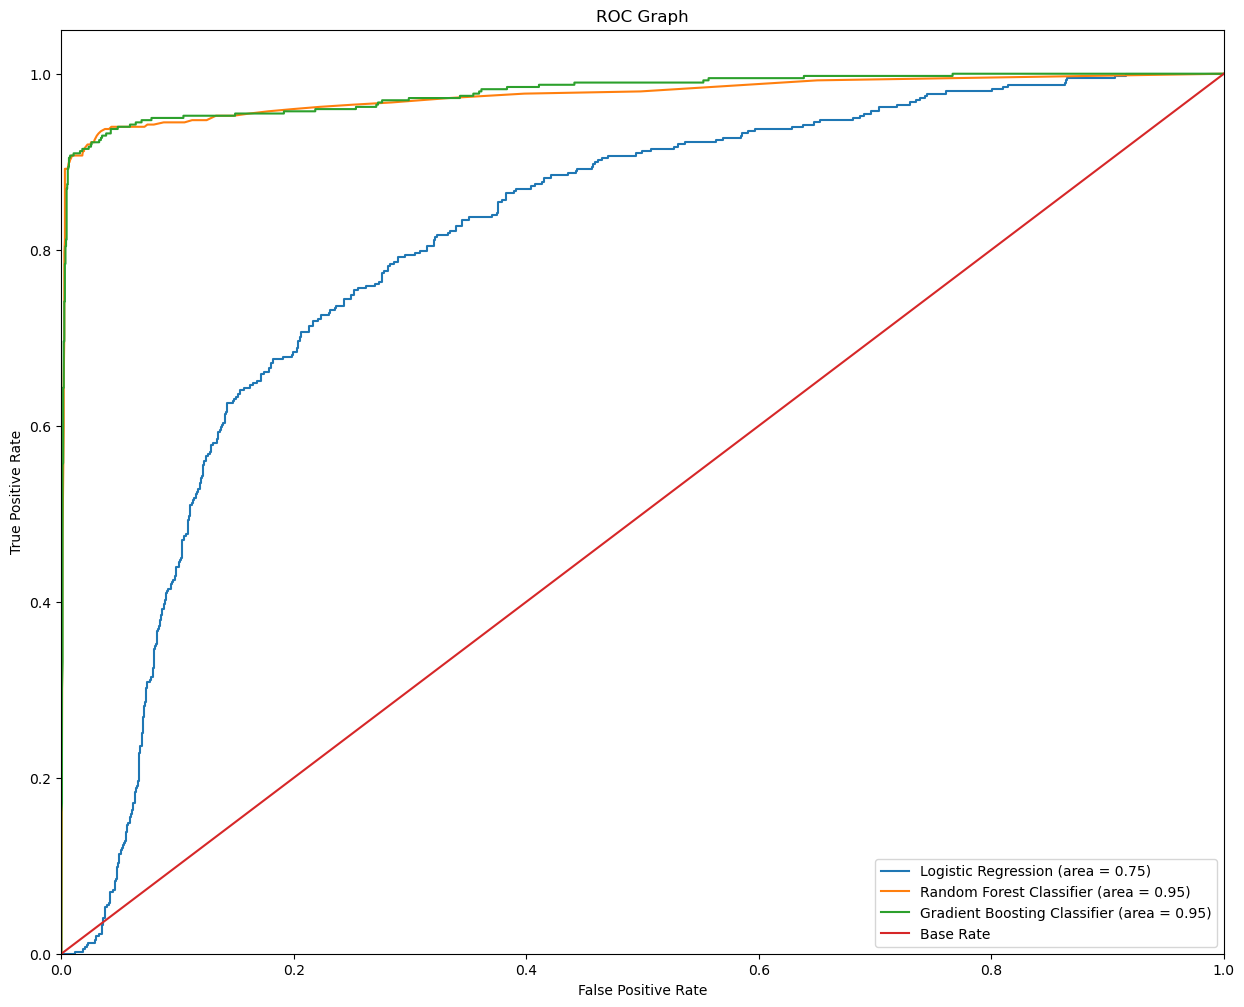

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[1640,  361],
       [ 131,  267]], dtype=int64)

In [41]:
# Confusion Matrix for GBC
confusion_matrix(y_test, gbc.predict(X_test))


array([[1949,   52],
       [  32,  366]], dtype=int64)

In [42]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, rf.predict(X_test))

array([[1974,   27],
       [  37,  361]], dtype=int64)

# Precision or Recall

It depends on how much cost/weight you want on your two types of errors: (1) False Positives or (2) False Negatives

We want our machine learn model to capture as much of the minority class as possible (turnover group). 
Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk
non-turnover employee.

* Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.
<br>

* Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire.
<br>
* Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

* __Recall When:__

    * You want to limit false negatives
    * You will get more False Positives
    * FN > FP <br>
    <br>
    
    

* __Precision When:__

    * You want to limit false positives
    * FP > FN
    

# Retention Plan

Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly.

1. __Safe Zone (Green)__ – Employees within this zone are considered safe.


2. __Low Risk Zone (Yellow)__ – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.


3. __Medium Risk Zone (Orange)__ – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly.


4. __High Risk Zone (Red)__ – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately.

In [44]:
# Ranking turnover probability for employees
rf.predict_proba(X_test)[175:185]

array([[0.93, 0.07],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ]])

In [45]:
list(rf.predict_proba(X_test)[175:185, 1])

[0.07, 0.08, 0.02, 0.04, 0.01, 0.0, 1.0, 0.02, 0.0, 1.0]

In [48]:
list(rf.predict_proba(X_test)[175:185, 1] > 0.2)

[False, False, False, False, False, False, True, False, False, True]